## Assignment 2: Meter Data formatting

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
def process_data(file_path, time_col, data_col):
    """
    process minutely eletricity consumption data to hourly

    """
    # Read the data
    data = pd.read_csv(file_path)
    
    # Convert the 'time' column to datetime
    data[time_col] = pd.to_datetime(data[time_col], format='%m/%d/%Y %H:%M')
    
    # Set the datetime column as the index
    data.set_index(time_col, inplace=True)
    
    # Resample and sum the data hourly
    hourly_resampled = data[data_col].resample('H').sum()
    hourly_resampled = hourly_resampled[hourly_resampled != 0]
    
    # Reset index 
    hourly_resampled = hourly_resampled.reset_index()
    
    # Format the datetime as string
    hourly_resampled[time_col] = hourly_resampled[time_col].dt.strftime('%m/%d  %H:%M:%S')
    return hourly_resampled

def correct_time_format(dt_str):
    dt_str = dt_str.strip()  # Remove beginning and end spaces
    parts = dt_str.split(' ')  # This will split by space
    date_part = ' '.join(parts[:-1])  # Join all but the last part as date
    time_part = parts[-1]  # The last part is the time
    hour, minute, second = map(int, time_part.split(':'))
    
    
    corrected_hour = hour - 1
    new_time = f'{corrected_hour:02}:{minute:02}:{second:02}'
    return f'{date_part} {new_time}'

def merge_datasets(hourly_file, resampled_data, time_col_hourly, time_col_resampled, data_col):
    """
    Merge two datasets

    """
    # Read the hourly data
    hour_data = pd.read_csv(hourly_file)
    hour_data[time_col_hourly] =[correct_time_format(hour_data[time_col_hourly][i]) for i in range(len(hour_data))]
    
    # Merge with the resampled data
    merge_data = hour_data.merge(resampled_data, left_on=time_col_hourly, 
                                 right_on=time_col_resampled, how='left')
    
    # Drop the duplicate time column from the resampled data
    merge_data = merge_data.drop(time_col_resampled, axis=1)
    
    # Convert data column from W to kW and rename
    merge_data[data_col] = merge_data[data_col] / 1000
    merge_data = merge_data.rename(columns={data_col: 'New'})
    
    
    # Set the time column from hourly data as index
    merge_data.set_index(time_col_hourly, inplace=True)
    merge_data = merge_data.fillna(0.0)  #fill the empty value with 0
   
    merge_data['Total'] = merge_data.sum(axis=1) # Calculate total consumption 

    return merge_data

In [139]:
file_path = './data/Assignment 2 - new.app4.csv'
time_col = 'time'
data_col = 'W_min'
hourly_data = process_data(file_path, time_col, data_col)

hourly_file = './data/Assignment 2 - USA_AL_Auburn-Opelika.AP.722284_TMY3_BASE.csv'
time_col_hourly = 'Date/Time'

merged_data = merge_datasets(hourly_file, hourly_data, time_col_hourly, time_col, data_col)
merged_data.head()
# merged_data.to_csv('out_put.csv') export the merged file if you want 

### Visualization : 



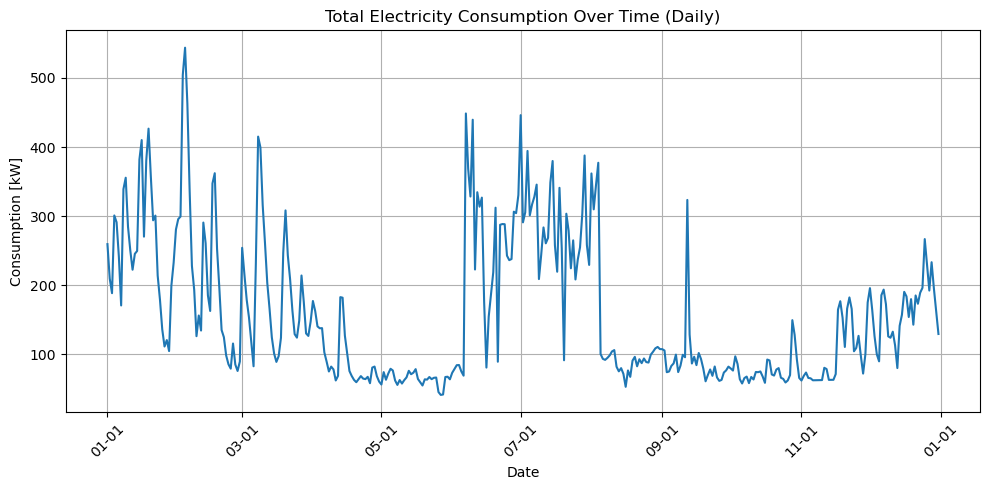

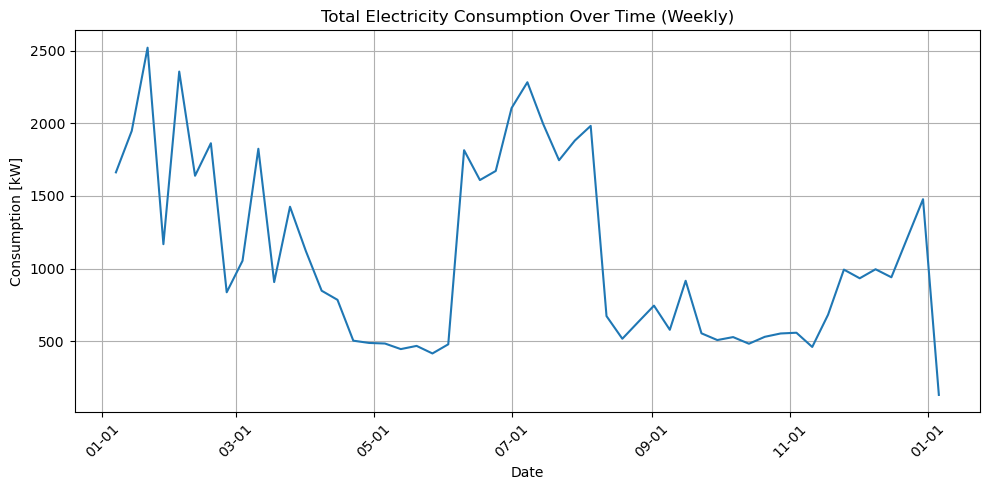

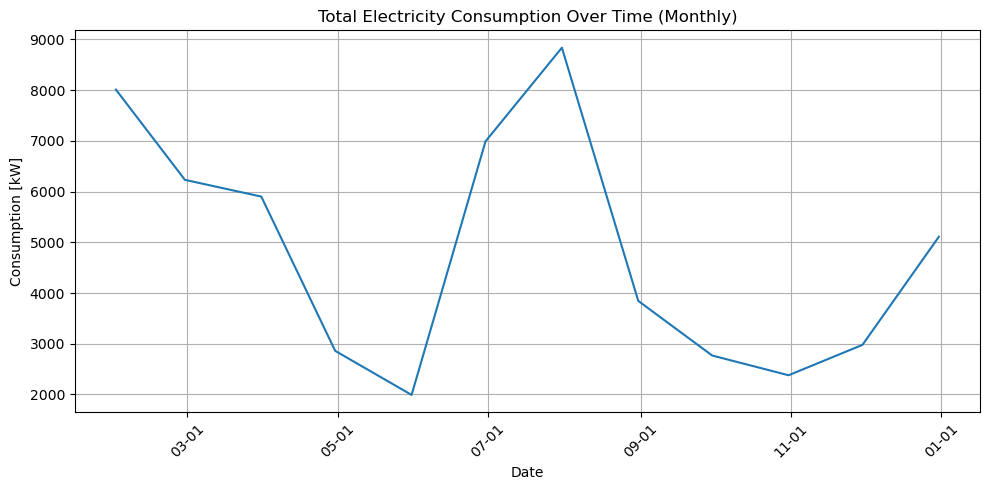

In [155]:
def plot_data(df, column_name):
    """
    Plots hourly consumption data from a specified column in a DataFrame.
    """
    df1 = df.copy()
    df1.index = pd.to_datetime(df1.index, format='%m/%d %H:%M:%S')
    
    # Resampling to daily data and plotting
    df_daily = df1.resample('D').sum()
    plt.figure(figsize=(10, 5))
    plt.plot(df_daily.index, df_daily[column_name], linestyle='-')
    plt.title('Total Electricity Consumption Over Time (Daily)')
    plt.xlabel('Date')
    plt.ylabel('Consumption [kW]')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m-%d'))
    plt.tight_layout()
    plt.show()
    
    # Resampling to weekly data and plotting
    df_weekly = df1.resample('W').sum()
    plt.figure(figsize=(10, 5))
    plt.plot(df_weekly.index, df_weekly[column_name], linestyle='-')
    plt.title('Total Electricity Consumption Over Time (Weekly)')
    plt.xlabel('Date')
    plt.ylabel('Consumption [kW]')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m-%d'))
    plt.tight_layout()
    plt.show()
    
    # Resampling to monthly data and plotting
    df_monthly = df1.resample('M').sum()
    plt.figure(figsize=(10, 5))
    plt.plot(df_monthly.index, df_monthly[column_name], linestyle='-')
    plt.title('Total Electricity Consumption Over Time (Monthly)')
    plt.xlabel('Date')
    plt.ylabel('Consumption [kW]')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m-%d'))
    plt.tight_layout()
    plt.show()

# Example usage assuming 'df' is already defined and contains hourly data
df1 = plot_data(merged_data, 'Total')


#### Summary: 

The daily plot shows a lot of variability in electricity consumption, with several sharp peaks and troughs. This suggests fluctuating daily usage, which might be influenced by various factors such as operational activity, differences between weekday and weekend usage, or even changes in temperature affecting heating and cooling needs. There are several sharp spikes that could be anomalies. 


The weekly plot smooths out some of the daily variability, giving a clearer trend of consumption. It seems there are cycles of higher and lower usage that might correlate with specific weeks of the month or particular events. The pattern suggests a possible weekly routine or operational cycle affecting usage. 


The monthly consumption plot shows a significant decrease around June, followed by a sharp increase, and then a decline again towards the end of the year. This pattern could indicate seasonal variations, possibly due to heating and cooling demands. The sharp peak in the middle of the year could be indicative of either a seasonal effect or a specific event that caused a surge in electricity usage.


From the daily, weekly, and monthly plots, it's clear that both seasonal and operational factors influence electricity consumption. The variability suggests that different days and times have significantly different consumption patterns, likely influenced by operational schedules, public holidays, or seasonal conditions. 

#### Note:for assignment2, I made an independent python file named data_formatting.py under the "code" folder